In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#check for NaN values
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64

In [4]:
X=df.iloc[:,2:].values
y=df.iloc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [5]:
#split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [6]:
pipeline = Pipeline([('scale',StandardScaler()),
                     ('pca',PCA(n_components=2)),
                     ('lr',LogisticRegression(random_state=1))])

In [7]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [8]:
pipeline.score(X_test,y_test)

0.94736842105263153

In [9]:
from sklearn.cross_validation import cross_val_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
scores = cross_val_score(estimator=pipeline,X=X_train,y=y_train,cv=10,n_jobs=1)

In [11]:
print('10 fold cross validation score are \n\n{}'.format(scores))

10 fold cross validation score are 

[ 0.89130435  0.97826087  0.97826087  0.91304348  0.93478261  0.97777778
  0.93333333  0.95555556  0.97777778  0.95555556]


In [12]:
print('Average accuracy : {} +/- {}'.format(round(np.mean(scores),3),round(np.std(scores),3)))

Average accuracy : 0.95 +/- 0.029


In [18]:
from sklearn.learning_curve import learning_curve, validation_curve

In [14]:
pipeline1 = Pipeline([('scale',StandardScaler()),
                      ('lr',LogisticRegression(penalty='l2',random_state=0))])

In [15]:
train_sizes,train_scores,test_scores = learning_curve(estimator=pipeline1,
                                                     X=X_train,
                                                     y=y_train,
                                                     cv=10,
                                                     train_sizes=np.linspace(0.1,1.0,10),
                                                     n_jobs=1)

In [16]:
train_mean=np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

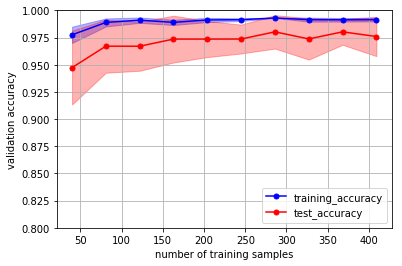

In [17]:
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training_accuracy')
plt.fill_between(train_sizes,train_mean - train_std,train_mean + train_std,alpha=0.3,color='blue')
plt.plot(train_sizes,test_mean,color='red',marker='o',markersize=5,label='test_accuracy')
plt.fill_between(train_sizes,test_mean - test_std,test_mean + test_std,alpha=0.3,color='red')
plt.xlabel('number of training samples')
plt.ylabel('validation accuracy')
plt.grid()
plt.ylim([0.8,1.0])
plt.legend(loc='lower right')
plt.show()

In [19]:
param_range = [0.001,0.01,0.1,1.0,10.0,100.0]
train_scores,test_scores = validation_curve(estimator=pipeline1,
                                            X=X_train,
                                            y=y_train,
                                            cv=10,
                                            param_name='lr__C',
                                            param_range=param_range)

In [21]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

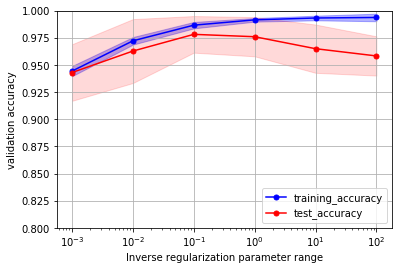

In [24]:
plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='training_accuracy')
plt.fill_between(param_range,train_mean - train_std,train_mean + train_std,alpha=0.3,color='blue')
plt.plot(param_range,test_mean,color='red',marker='o',markersize=5,label='test_accuracy')
plt.fill_between(param_range,test_mean - test_std,test_mean + test_std,alpha=0.15,color='red')
plt.xlabel('Inverse regularization parameter range')
plt.ylabel('validation accuracy')
plt.grid()
plt.xscale('log')
plt.ylim([0.8,1.0])
plt.legend(loc='lower right')
plt.show()